# Predicting House prices in Bengaluru

### The following table of contents will help navigation
1. <a href="#section-1">Data Understanding</a>
 * <a href="#section-1">Raw Data</a>
 * <a href="#section-1-2">Tidy Data</a>
 * <a href="#section-1-3">Clean Data</a>
    * <a href="#section-1-3-1">Categorical Features</a>
2. <a href="section-2">Data Preparation</a> [XX Not Operable]

### This is a Machine Hack competition dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

## <a id="section-1"><font color="#f44336">Step 1.1: </font>Data Understanding <center><font color="#2196F3"><u>Raw Data</u></font></center></a>

In [3]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
print("Number of features: {}\nNumber of examples: {}".format(df.shape[1],df.shape[0]))

Number of features: 9
Number of examples: 13320


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## <a id="section-1-2"><font color="#f44336">Step 1.2: </font>Data Understanding <center><font color="#2196F3"><u>Tidy Data</u></font></center></a>

> **It is essential to tidy the raw data before cleaning it. Following are the crucial steps to tidy the data:**
* Check for complete duplicate examples and remove them
* Check for cardinality of features and remove constant cardinality if any

**After the above steps prepare a new dataframe called the tidy dataframe**

In [6]:
# saving the raw data in a raw dataframe
df_raw = df

In [7]:
# Are duplicates in the data
df_raw[df_raw.duplicated(keep="first")]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.00
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.50
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.00
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00
1449,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1693,3.0,3.0,57.39
1477,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1330,2.0,1.0,56.00
1668,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1075,2.0,1.0,45.00
1763,Super built-up Area,Ready To Move,KUDLU MAIN ROAD,3 BHK,NaN,1464,3.0,2.0,56.00
2050,Super built-up Area,Ready To Move,Haralur Road,2 BHK,RInceeg,1140,2.0,2.0,43.00


>**<font color="#009688">FINDINGS: </font>**
* The above 529 examples are exact duplicates present data
* This approximately 4% of the entire training data

**<font color="##CDDC39">These examples will be dropped</font>**

In [8]:
# Dropping all duplicates
df_raw.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates the number of examples have reduced to \n\t\t{} from 13320".format(len(df_raw)))

After dropping duplicates the number of examples have reduced to 
		12791 from 13320


In [9]:
pd.options.display.max_rows=10000

In [ ]:
# Finding null values
# df_raw[df_raw.isnull().any(axis=1)]

In [10]:
df_raw.dropna(axis=0,how='all',inplace=True)

In [13]:
print("{} rows had complete empty values".format(len(df_raw)-12791))

0 rows had complete empty values


In [14]:
# Check for cardinality in each feature
df_features = []
df_unique = []
df_dtype = []
for cols in df_raw.columns:
    df_features.append(cols)
    df_unique.append(str(len(df_raw[cols].unique())))
    df_dtype.append(df_raw[cols].dtype)
df_cardinality = pd.DataFrame()
df_cardinality['Features'] = df_features
df_cardinality['Cardinality'] = df_unique
df_cardinality['Type'] = df_dtype
df_cardinality

,Features,Cardinality,Type
0,area_type,4,object
1,availability,81,object
2,location,1306,object
3,size,32,object
4,society,2689,object
5,total_sqft,2117,object
6,bath,20,float64
7,balcony,5,float64
8,price,1994,float64


>**<font color="#009688">FINDINGS: </font>**
* There are no features with a constant cardinality

**<font color="##CDDC39">We shall look closer for each feature's values</font>**

In [15]:
# Look for feature's unique values
print('\t\tFeature:Cardinality\n\t\t\t[Values]')
for cols in df_raw.columns:
    print('{}:{}\n\t{}'.format(cols,str(len(df_raw[cols].unique())),df_raw[cols].unique()))

		Feature:Cardinality
			[Values]
area_type:4
	['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability:81
	['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location:1306
	['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas na

>**<font color="#009688">FINDINGS: </font>**
* **<font color="#9C27B0">Area Type: </font>** No issues
* **<font color="#9C27B0">Availability: </font>** There are no issues at the moment but we might only use Months
* **<font color="#9C27B0">Location: </font>** No issues
* **<font color="#9C27B0">Size: </font>** Remove outliers and change them to numeric
* **<font color="#9C27B0">Society: </font>** There seems to be unwanted data we shall remove them
* **<font color="#9C27B0">Total Square Feet: </font>** Some are numbers and some are range
* **<font color="#9C27B0">Bath: </font>** Missing values and outliers
* **<font color="#9C27B0">Price: </font>** No issues

**<font color="##CDDC39">All of the issues will be handled in cleaning stage of the data</font>**

In [16]:
# We have created the tidy dataset
df_tidy = df_raw

## <a id="section-1-3"><font color="#f44336">Step 1.3: </font>Data Understanding <center><font color="#2196F3"><u>Clean Data</u></font></center></a>

**This part of the book is the most essential we will perform the following functions**
* Converting features to either continuous or categorical types
* Checking each feature 1 by 1 for data quality issues

> **Data Quality issues can include checks for: **
- Presence of outliers,
- Missing values
- Skewed distributions of the feature
- +ve or -ve Correlations


* Generating the data quality report

In [17]:
df_clean = df_tidy

### *<font color="#F9A825">Converting to appropriate datatypes</font>*

In [18]:
df_clean.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [19]:
df_continuous = df_clean.select_dtypes('float64')
df_categorical = df_clean.select_dtypes('object')

In [20]:
df_continuous.head()

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


In [21]:
df_categorical.head()

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200


<hr>
**Begin with data understanding**

## <a id="section-1-3-1"><font color="#1E88E5">&#9658; Categorical Features</font></a>

In [23]:
# First we will generate a Data Quality Report for these columns to get a better understanding
# Data Quality Report
df_categorical_columns = df_categorical
category_desc = df_categorical_columns.describe().T
miss=[]
freq=[]
for i,cols in enumerate(df_categorical_columns.columns):
    miss.append(100-((category_desc['count'][i]/df_categorical_columns.shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df_categorical_columns.columns:
    df_temp = df_categorical_columns[cols].value_counts()
    card = len(df_categorical_columns[cols].unique())
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

,count,unique,top,freq,% topFreq,% miss,sec mode,sec mode freq
area_type,12791,4,Super built-up Area,8317,65.022281,0.000000,Built-up Area,2398
availability,12791,81,Ready To Move,10172,79.524666,0.000000,18-May,292
location,12790,1305,Whitefield,523,4.089132,0.007818,Sarjapur Road,379
size,12775,31,2 BHK,4931,38.598826,0.125088,3 BHK,4120
society,7463,2688,GrrvaGr,68,0.911162,41.654288,PrarePa,63
total_sqft,12791,2117,1200,808,6.316942,0.000000,1100,210


>**<font color="#009688">FINDINGS: </font>**
* We can see that society has ~42% missing data and the top and second mode doesn't also make any sense **society** will be dropped
* Location is 1 missing value, we will fill it with mode
* Size has approx 0.1% missing value, we will fill it as well with mode
* Rest other features will be further scrutinized

**<font color="##CDDC39">Cleaning each feature at a time</font>**

#### Feature 1:  *<font color="#4CAF50">Area Type</font>*

In [25]:
pd.unique(df_clean['area_type'].values.ravel())

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

>**<font color="#009688">FINDINGS: </font>**
* We can see that area type has just 4 unique values
* The issue here is that there are unwanted extra spaces. These spaces are consistent but we will still clean them

**<font color="##CDDC39">Vectorization will be used for a faster process</font>**

In [26]:
# Removing extra spaces
df_clean.area_type = df.area_type.replace('\s+',' ',regex=True)

In [27]:
# Checking if it worked
pd.unique(df_clean['area_type'].values.ravel())

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

The feature **Area Type** is cleaned

In [28]:
# Now see how many per group
df_area_type_grouped = df_clean.groupby(['area_type']).agg(['count']).reset_index()

Text(0,1,'Area vs Price')

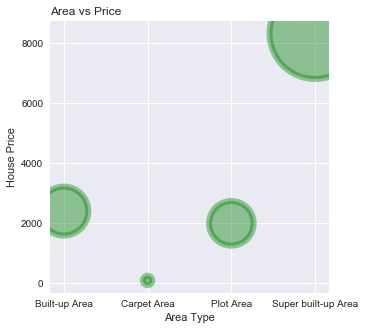

In [29]:
# Understanding the behaviour of area type with price
sns.set()
f,ax = plt.subplots(figsize=(5,5))
plt.scatter(df_area_type_grouped['area_type'], df_area_type_grouped['price'],s=df_area_type_grouped['price']['count'], c="green", alpha=0.4, linewidth=6)
# Add titles (main and on axis)
plt.xlabel("Area Type")
plt.ylabel("House Price")
plt.title("Area vs Price", loc="left")

>**<font color="#009688">FINDINGS: </font>**
* Carpet Area has the least count of properties in the data
* Super built-up Area have the most number of properties listed in this data
* Built up area and Plot area are averaged out approximately around 2000 examples

#### Feature 2:  *<font color="#4CAF50">Availability</font>*

In [30]:
print(pd.unique(df_clean['availability'].values.ravel()))
print(len(pd.unique(df_clean['availability'].values.ravel())))

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
81


>**<font color="#009688">FINDINGS: </font>**
* There are around 81 unique values
* This data seems well distributed. We need to understand this feature more
* We will plot this feature to know more about it

**<font color="##CDDC39">Plotting count plot will be helpful to understand the distribution and importance of this feature</font>**

In [31]:
# Now see how many per group
df_availability_grouped = df_clean.groupby(['availability']).agg(['count']).reset_index()

In [32]:
df_availability_grouped

,availability,area_type,location,size,society,total_sqft,bath,balcony,price
,,count,count,count,count,count,count,count,count
0,14-Jul,1,1,1,1,1,1,1,1
1,14-Nov,1,1,1,0,1,1,1,1
2,15-Aug,1,1,1,1,1,1,1,1
3,15-Dec,1,1,1,1,1,1,1,1
4,15-Jun,1,1,1,1,1,1,1,1
5,15-Nov,2,2,2,1,2,2,0,2
6,15-Oct,2,2,2,2,2,2,0,2
7,16-Dec,4,4,4,2,4,4,4,4
8,16-Jan,1,1,1,1,1,1,1,1


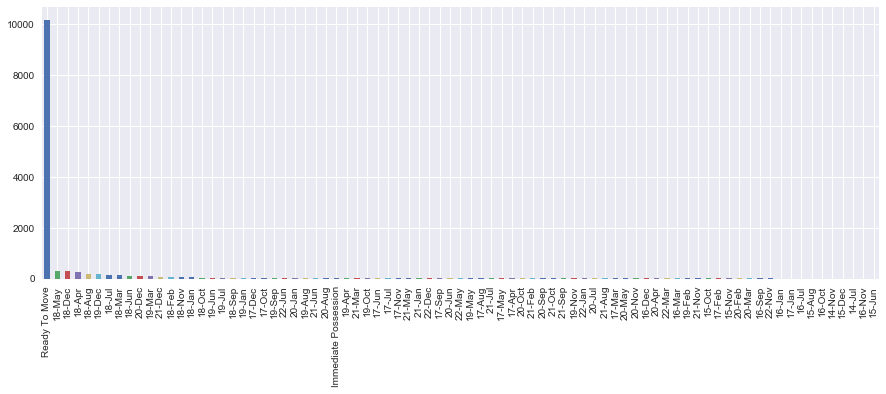

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
df_clean['availability'].value_counts().plot(ax=ax, kind='bar')

>**<font color="#009688">FINDINGS: </font>**
* The maximum examples in the dataset are about Ready to Move properties
* Most of the other values have just single examples, it will be much better to group them into Months

**<font color="##CDDC39">Next step in <a href="section-2">Data Preparation</a> will be to convert the rest of the columns into just Month</font>**

#### Feature 3:  *<font color="#4CAF50">Location</font>*

In [34]:
print(pd.unique(df_clean['location'].values.ravel()))
print(len(pd.unique(df_clean['location'].values.ravel())))

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
1306


>**<font color="#009688">FINDINGS: </font>**
* There are around 1306 unique values
* This feature is a free text. It might have lots of different errors.
* We might want to analyse this feature more closely

**<font color="##CDDC39">We will standardize all the addresses now</font>**

In [59]:
# Step 1: First thing is we will fill na with mode
df_clean['location'].fillna(df_clean.location.mode()[0],inplace=True)

# Step 2: Stripping off any trailing spaces
df_clean['location'] = df_clean['location'].map(lambda x: x.strip())

# Check if there are any special characters or begining or trailing spaces in the column
df_clean[df_clean.location.str.match(r'(\W)',na=False)].location.values

array([], dtype=object)

> The above empty array shows there aren't any special characters or trailing spaces in the location column

In [74]:
# df_clean[df_clean.location.str.contains('Kengeri',na=False)]
df_locations_unique = pd.DataFrame({'location':pd.unique(df.location.values.ravel())})

In [87]:
# Step 3: Checking for sigular values in begining
df_locations_unique[df_locations_unique.location.str.match(r'(\w)\s+',na=False,case=False)]

,location
69,T Dasarahalli
220,K N Extension
239,1 Giri Nagar
279,K G Colony
327,B Narayanapura
352,4 Bedroom Farm House in Bagalur
459,D Souza Layout
519,T K Reddy Layout
538,1 Ramamurthy Nagar
632,B Channasandra


>**<font color="#009688">FINDINGS: </font>**
* K N Extension -> Kamla Nehru Extension
* 1 Giri Nagar change to Giri Nagar
* 4 Bedroom Farm House in Bagalur change to Bagalur
* 1 Ramamurthy Nagar to Ramamurthy Nagar
* T c palya and T C Palya main Road -> Thambu Chetty Palya
* check other values for J P Nagar 7th Phase and Ramayya City
* 1 Annasandrapalya change to Annasandrapalya
* K R C kothanur -> KRC and kothanur are different places
* 5 Bedroom Farm House in Lakshmipura change to Lakshmipura
* 1 Immadihalli change to Immadihalli
* 2 Bedroom Furnished Farm House in Kolar Road change to Kolar Road


In [114]:
# We will now count the number of words in the columns and find the values
df_locations_unique['count'] = df_locations_unique['location'].str.split().apply(len).tolist()

In [118]:
# Find anomalies in the locations with one word
df_locations_count_1 = df_locations_unique[df_locations_unique['count']==1]
df_locations_count_1.sort_values(by='location')

,location,count
879,1Channasandra,1
1145,1Hoysalanagar,1
1224,1Kasavanhalli,1
1148,Aavalahalli,1
325,Abbigere,1
678,Adityanagar,1
1175,Adugodi,1
1233,Allalasandra,1
384,Alur,1
228,Ambalipura,1


>**<font color="#009688">FINDINGS: </font>**
* ITPL -> International Tech Park Bangalore
* 1Channasandra -> Channasandra
* 1Hoysalanagar -> Hoysalanagar
* 1Kasavanhalli	-> Kasavanhalli	
* Doddanakunte -> Doddanekundi<br>
> **The following are duplicates**
* adigondanhalli
* arudi
* basaveshwarnagar
* cooketown
* elachenahalli
* frazertown
* ittamadu
* kadubisnahalli
* manyata
* sankeswari
* south
* tc.palya	
* vinayakanagar
* whitefiled




In [119]:
# Find anomalies in the locations with two words
df_locations_count_2 = df_locations_unique[df_locations_unique['count']==2]
df_locations_count_2.sort_values(by='location')

,location,count
791,1 Annasandrapalya,2
1066,1 Immadihalli,2
736,1Hanuman Nagar,2
828,A Narayanapura,2
175,AECS Layout,2
1071,AGB Layout,2
486,AGS Layout,2
481,AMS Layout,2
1290,Abshot Layout,2
818,Achins Road,2


>**<font color="#009688">FINDINGS: </font>**
* 1 Annasandrapalya -> Annasandrapalya
* 1 Immadihalli -> Immadihalli
* 1Hanuman Nagar -> Hanuman Nagar
* Remove east and west
* Remove Road, Rd, rd, road
* Remove punctuation marks Hoodi Circle, -> Hoodi Circle
* T.C PALYA
* T.C. Palya
* TC Palaya
* tc.palya
* Viswapriyanagar.begur Road.bommanahalli. -> Begur
* Yelahanka,MVIT college -> Yelahanka
* t.c palya







In [121]:
# Find anomalies in the locations with 3 words
df_locations_count_3 = df_locations_unique[df_locations_unique['count']==3]
df_locations_count_3.sort_values(by='location')

,location,count
239,1 Giri Nagar,3
538,1 Ramamurthy Nagar,3
948,1A Block Koramangala,3
127,1st Block Jayanagar,3
593,1st Block Koramangala,3
782,1st Stage Domlur,3
885,2nd Block Jayanagar,3
969,2nd Block Koramangala,3
242,2nd Stage Nagarbhavi,3
531,3rd Block Banashankari,3


>**<font color="#009688">FINDINGS: </font>**
* Remove all numbers
* Remove Block, Stage, I, II, III, IV, V, VI
* Basvasamithi Layout Vidyaranyapura -> Vidyaranyapura
* ECC Road, Whitefield, -> Whitefield
* EPIP AREA, WHITEFIELD -> Whitefield
* HOSUR MAIN ROAD, HOSUR RMAIN ROAD
* Near Electronic City, -> Electronic City
* Off Bannergatta Road, Off Bannergatta road, Off Sarjapur Road, Off Sarjapur road,
* RMV 2nd Stage -> RMV
* T c palya	
* Whitefield ECC Road
* remove main road

In [122]:
# Find anomalies in the locations with 4 words
df_locations_count_4 = df_locations_unique[df_locations_unique['count']==4]
df_locations_count_4.sort_values(by='location')

,location,count
924,1st Block BEL Layout,4
998,1st Block HBR Layout,4
468,1st Block HRBR Layout,4
376,1st Phase JP Nagar,4
675,1st Stage Indira Nagar,4
530,2Electronic City Phase II,4
1024,2nd Block Bel Layout,4
1134,2nd Block Hbr Layout,4
409,2nd Block Hrbr Layout,4
277,2nd Phase JP Nagar,4


In [124]:
# Find anomalies in the locations with more than 5 words
df_locations_count_5 = df_locations_unique[df_locations_unique['count']>=5]
df_locations_count_5.sort_values(by='location')

,location,count
1288,12th cross srinivas nagar banshankari 3rd stage,7
834,1st Stage Radha Krishna Layout,5
1177,2 Bedroom Furnished Farm House in Kolar Road,8
986,2nd Stage Arekere Mico Layout,5
1028,"2nd phase jp nagar, jp nagar",6
1260,3rd Stage Raja Rajeshwari Nagar,5
352,4 Bedroom Farm House in Bagalur,6
984,5 Bedroom Farm House in Lakshmipura,6
305,"6th block banashankari 3rd stage, 100 feet ORR",8
906,"Ananthanagar Phase 1,Electronic City , phase 2",7


In [125]:
# # Cleaning Kengeri
# p = re.compile(r'(Kengeri Satellite Town).+')
# df_clean['location'] = df_clean.location.str.replace(p,'Kengeri Satellite Town')
# df_locations_unique[df_locations_unique.location.str.contains('Kengeri',na=False)]

In [ ]:
# sns.boxplot(df_clean['availability'])

In [ ]:
# # Here we will use a much better version of plotting this feature
# # We will divide the entire plot in two parts:
# # 1. A box plot showing the statistical distribution along the Inter Quartile Range helping us understand
# #    Mean, Std Dev Min and Max values
# # 2. A histogram display the behavioural distribution of the feature

# # Getting the figure and axes for bot the parts
# ########## EXPLANATION:::::::::
# ################## We are creating just one figure [['f']] and two axes [['ax_box'],['ax_hist']] names are self-explanatory
# ################## We then ask matplotlib to split the [['f']] (figure) in [['nrows = 2']] i.e., 2 rows
# ################## The 2 rows are going to share the same x axis
# ################## Then providing the heigh ratios for both the plots to the GridSpec constructor to layout the appropriate
# ##################### grid layout for us
# f, (ax_box, ax_his) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})

# # Add a graph in each part
# sns.boxplot(df_clean['availability'], ax=ax_box)
# sns.distplot(df_clean['availability'], ax=ax_hist)

# # Remove x axis name for the boxplot
# ax_box.set(xlabel='')